In [1]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
data_path = '/workdir/data/covid19/'

In [6]:
train_df = pd.read_csv(data_path + 'train.csv.zip')
test_df = pd.read_csv(data_path + 'test.csv.zip')
submission_df = pd.read_csv(data_path + 'submission.csv.zip')

In [7]:
train_df.head()

,Id,County,Province_State,Country_Region,Population,Weight,Date,Target,TargetValue
0,1,NaN,NaN,Afghanistan,27657145,0.058359,2020-01-23,ConfirmedCases,0.0
1,2,NaN,NaN,Afghanistan,27657145,0.583587,2020-01-23,Fatalities,0.0
2,3,NaN,NaN,Afghanistan,27657145,0.058359,2020-01-24,ConfirmedCases,0.0
3,4,NaN,NaN,Afghanistan,27657145,0.583587,2020-01-24,Fatalities,0.0
4,5,NaN,NaN,Afghanistan,27657145,0.058359,2020-01-25,ConfirmedCases,0.0


In [10]:
test_df.head()

,ForecastId,County,Province_State,Country_Region,Population,Weight,Date,Target
0,1,NaN,NaN,Afghanistan,27657145,0.058359,2020-04-27,ConfirmedCases
1,2,NaN,NaN,Afghanistan,27657145,0.583587,2020-04-27,Fatalities
2,3,NaN,NaN,Afghanistan,27657145,0.058359,2020-04-28,ConfirmedCases
3,4,NaN,NaN,Afghanistan,27657145,0.583587,2020-04-28,Fatalities
4,5,NaN,NaN,Afghanistan,27657145,0.058359,2020-04-29,ConfirmedCases


In [11]:
submission_df.tail()

,ForecastId_Quantile,TargetValue
935005,311669_0.5,1
935006,311669_0.95,1
935007,311670_0.05,1
935008,311670_0.5,1
935009,311670_0.95,1


In [12]:
train_df[train_df.Country_Region == 'Japan'].head(1)

,Id,County,Province_State,Country_Region,Population,Weight,Date,Target,TargetValue
36784,42561,NaN,NaN,Japan,126960000,0.053592,2020-01-23,ConfirmedCases,0.0


In [13]:
train_df.query('Country_Region == "Japan" and Target == "Fatalities"').head()

,Id,County,Province_State,Country_Region,Population,Weight,Date,Target,TargetValue
36785,42562,NaN,NaN,Japan,126960000,0.535923,2020-01-23,Fatalities,0.0
36787,42564,NaN,NaN,Japan,126960000,0.535923,2020-01-24,Fatalities,0.0
36789,42566,NaN,NaN,Japan,126960000,0.535923,2020-01-25,Fatalities,0.0
36791,42568,NaN,NaN,Japan,126960000,0.535923,2020-01-26,Fatalities,0.0
36793,42570,NaN,NaN,Japan,126960000,0.535923,2020-01-27,Fatalities,0.0


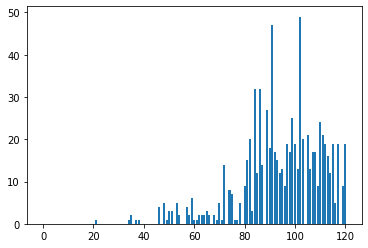

In [16]:
japan_fatalities = train_df.query('Country_Region == "Japan" and Target == "Fatalities"')['TargetValue'].array

plt.bar(range(0, japan_fatalities.shape[0]), japan_fatalities);

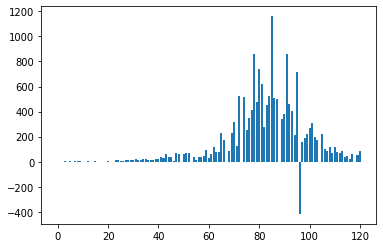

In [17]:
japan_confirmed = train_df.query('Country_Region == "Japan" and Target == "ConfirmedCases"')['TargetValue'].array

plt.bar(range(0, japan_confirmed.shape[0]), japan_confirmed);

In [83]:
train_df.query('Country_Region =="Japan" and TargetValue < 0')

,Id,County,Province_State,Country_Region,Population,Weight,Date,Target,TargetValue
36976,42753,NaN,NaN,Japan,126960000,0.053592,2020-04-28,ConfirmedCases,-417.0


In [ ]:
train_df['TargetValue']

In [136]:
train_df[train_df['TargetValue'] < 0]['TargetValue']

2098       -1.0
2380       -2.0
2506       -1.0
2618       -1.0
2678       -1.0
          ...  
835524     -1.0
835862   -525.0
836028    -21.0
836551     -6.0
838004     -6.0
Name: TargetValue, Length: 3461, dtype: float64

In [141]:
from typing import List

In [159]:
def test(num: List[int]) -> None:
    print(num)
    print('fasdf')

In [160]:
l = [1,2,3,4,5]
d = (1,2,3,4,5)

In [161]:
test(d)

(1, 2, 3, 4, 5)
fasdf


In [122]:
us_province = train_df[train_df['Country_Region']=='US']['Province_State'].unique()

In [123]:
us_province

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Guam', 'Hawaii', 'Idaho', 'Illinois',
       'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine',
       'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont',
       'Virgin Islands', 'Virginia', 'Washington', 'West Virginia',
       'Wisconsin', 'Wyoming', nan], dtype=object)

In [167]:
train_df[train_df['Country_Region']=='US']['Province_State'].isnull()

58564     False
58565     False
58566     False
58567     False
58568     False
          ...  
832475     True
832476     True
832477     True
832478     True
832479     True
Name: Province_State, Length: 773916, dtype: bool

In [170]:
train_df.loc['TargetValue']

KeyError: 'TargetValue'